# Practice Cleaning/EDA - Car Dataset 
Pandas is the primary library that we will use for pre-processing and exploring out data! Get familiar with it. Learn it. Love it. It's your life now. 
[Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html)

## Load Libraries 

In [11]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [13]:
#check out the matplotlib 'styles'

#ggplot and givethirtyeight are popular

plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

## Load the Data 
- Get and research the data
- Load into notebook with Pandas
- View basic info and summary stats

In [9]:
#import data 
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [15]:
#view information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## Scrub the Data
* Do we have missing values? 
* Do we need to change any of our dtypes? 
* How about the column names? 
    -No spaces or special characters
* Should we drop any columns? 
* Are there duplicates? Missing or Null values? 
* Check for outliers. 

In [27]:
#rename columns 
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [28]:
#checking for duplicates and drop if any
dup_rows_df = df[df.duplicated()]
print(dup_rows_df)

         make     model  year             engine_fuel_type  engine_hp  \
14        BMW  1 Series  2013  premium unleaded (required)      230.0   
18       Audi       100  1992             regular unleaded      172.0   
20       Audi       100  1992             regular unleaded      172.0   
24       Audi       100  1993             regular unleaded      172.0   
25       Audi       100  1993             regular unleaded      172.0   
...       ...       ...   ...                          ...        ...   
11481  Suzuki      X-90  1998             regular unleaded       95.0   
11603   Volvo      XC60  2017             regular unleaded      302.0   
11604   Volvo      XC60  2017             regular unleaded      240.0   
11708  Suzuki       XL7  2008             regular unleaded      252.0   
11717  Suzuki       XL7  2008             regular unleaded      252.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
14                  6.0            MANUAL 

In [33]:
df.shape
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11199 non-null  object 
 1   model              11199 non-null  object 
 2   year               11199 non-null  int64  
 3   engine_fuel_type   11196 non-null  object 
 4   engine_hp          11130 non-null  float64
 5   engine_cylinders   11169 non-null  float64
 6   transmission_type  11199 non-null  object 
 7   driven_wheels      11199 non-null  object 
 8   number_of_doors    11193 non-null  float64
 9   market_category    7823 non-null   object 
 10  vehicle_size       11199 non-null  object 
 11  vehicle_style      11199 non-null  object 
 12  highway_mpg        11199 non-null  int64  
 13  city_mpg           11199 non-null  int64  
 14  popularity         11199 non-null  int64  
 15  msrp               11199 non-null  int64  
dtypes: float64(3), int64(5

In [38]:
#are there any missing rows? Deal with them.

#Solutions: Replace with median/mode/mean

print(df.isnull().sum())

df  = df.dropna()

print(df.isnull().sum())


make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3376
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64
make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64


## Exploratory Data Analysis 
- summarize main characteristics of the data
- gain better understanding of the data-set,
- uncover relationships between different variables, and
- extract important variables for the problem we are trying to solve

#### Helpful methods include:
- unique()
- value_counts()

In [39]:
#view descriptive stats
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,7735.00000,7735.000000,7735.000000,7735.000000,7735.00000,7735.000000,7735.000000,7.735000e+03
mean,2012.14958,277.632062,5.825469,3.421332,26.52980,19.468649,1513.098772,5.102826e+04
std,6.23167,115.529955,1.895593,0.895054,7.78492,7.231534,1429.197317,7.153777e+04
min,1990.00000,55.000000,0.000000,2.000000,12.00000,7.000000,2.000000,2.000000e+03
25%,2010.00000,194.000000,4.000000,2.000000,22.00000,16.000000,520.000000,2.622500e+04
50%,2015.00000,270.000000,6.000000,4.000000,26.00000,18.000000,1013.000000,3.560000e+04
75%,2016.00000,325.000000,6.000000,4.000000,30.00000,22.000000,2009.000000,4.947750e+04
max,2017.00000,1001.000000,16.000000,4.000000,354.00000,137.000000,5657.000000,2.065902e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24ff0810>,
      dtype=object)

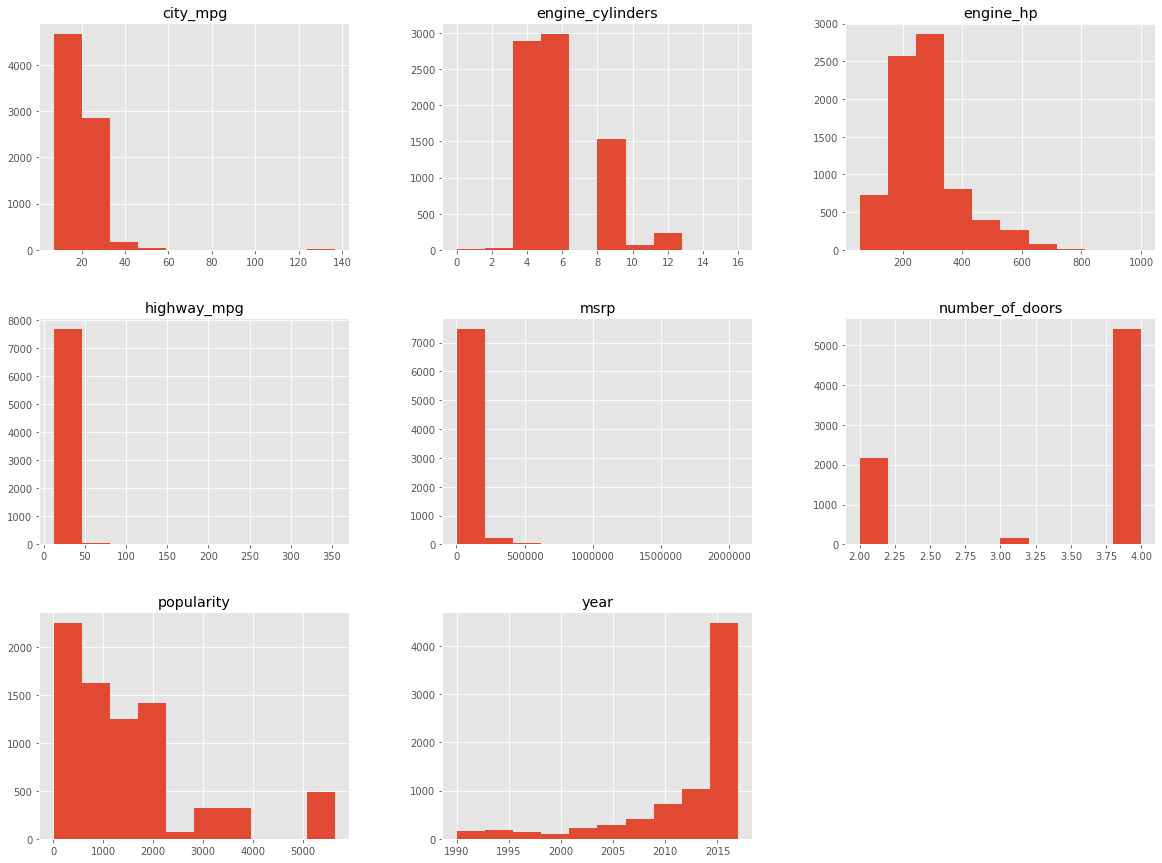

In [42]:
#view histograms of every column 
df.hist(figsize = (20,15))

## Groupby
The “groupby” method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.


In [45]:
#What type of driven wheel is most valuable? 

df_group_drive = df.groupby(['driven_wheels'])['msrp'].mean()
df_group_drive

driven_wheels
all wheel drive      61444.405393
four wheel drive     48740.482704
front wheel drive    25924.110476
rear wheel drive     70237.459322
Name: msrp, dtype: float64

In [46]:
#what type of driven wheel is most valuable based on body style? 

df_group_drive = df.groupby(['driven_wheels','vehicle_style'])['msrp'].mean()
df_group_drive

driven_wheels      vehicle_style      
all wheel drive    2dr Hatchback            9240.800000
                   2dr SUV                 35551.363636
                   4dr Hatchback           32012.200000
                   4dr SUV                 41034.702845
                   Cargo Van               32760.000000
                   Convertible            167234.000000
                   Convertible SUV         47975.000000
                   Coupe                  154467.195876
                   Crew Cab Pickup         39509.074074
                   Passenger Van           34525.000000
                   Regular Cab Pickup       5667.000000
                   Sedan                   58154.445633
                   Wagon                   38565.578231
four wheel drive   2dr Hatchback            2000.000000
                   2dr SUV                 32704.666667
                   4dr Hatchback            2000.000000
                   4dr SUV                 64061.054608
         

A table of this form isn’t the easiest to read, and also not very easy to visualize. To make it easier to understand, we can transform this table to a pivot table by using the pivot.

In [13]:
#use pivot to transform the table 

In [14]:
#fill in missing values 

## Visualizations always help EDA 

In [ ]:
#Visual 1 

In [ ]:
#Visual 2 